In [22]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import sklearn as sk

In [23]:
df = pd.read_csv(r"data\credit_scoring.csv")
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


**Data Description:**
- `children` - number of children in the family
- `days_employed` - number of days employed
- `dob_years` - client's age in years
- `education` - client's education level
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - client's gender
- `income_type` - type of employment
- `debt` - whether the client has a loan debt
- `total_income` - monthly income
- `purpose` - purpose of the loan application

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [25]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [26]:
df.isna().sum()/len(df)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [27]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [28]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [29]:
df1 = df.select_dtypes(include=['int64', 'float64']).copy()
df1.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1,-8437.673028,42,0,0,0,253875.639453
1,1,-4024.803754,36,1,0,0,112080.014102
2,0,-5623.422610,33,1,0,0,145885.952297
3,3,-4124.747207,32,1,0,0,267628.550329
4,0,340266.072047,53,1,1,0,158616.077870


In [30]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [31]:
df1.mean()

children                 0.538908
days_employed        63046.497661
dob_years               43.293380
education_id             0.817236
family_status_id         0.972544
debt                     0.080883
total_income        167422.302208
dtype: float64

In [32]:
df1.median()

children                 0.000000
days_employed        -1203.369529
dob_years               42.000000
education_id             1.000000
family_status_id         0.000000
debt                     0.000000
total_income        145017.937533
dtype: float64

In [33]:
df1.min()

children               -1.000000
days_employed      -18388.949901
dob_years               0.000000
education_id            0.000000
family_status_id        0.000000
debt                    0.000000
total_income        20667.263793
dtype: float64

In [34]:
df1.max()

children            2.000000e+01
days_employed       4.017554e+05
dob_years           7.500000e+01
education_id        4.000000e+00
family_status_id    4.000000e+00
debt                1.000000e+00
total_income        2.265604e+06
dtype: float64

In [35]:
df1 = df1.fillna(df1.mean(numeric_only=True))

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education_id      21525 non-null  int64  
 4   family_status_id  21525 non-null  int64  
 5   debt              21525 non-null  int64  
 6   total_income      21525 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


**Doing same thing with sklear**

In [58]:
df2 = df.select_dtypes(include=['number']).copy()
df2.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1,-8437.673028,42,0,0,0,253875.639453
1,1,-4024.803754,36,1,0,0,112080.014102
2,0,-5623.422610,33,1,0,0,145885.952297
3,3,-4124.747207,32,1,0,0,267628.550329
4,0,340266.072047,53,1,1,0,158616.077870


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education_id      21525 non-null  int64  
 4   family_status_id  21525 non-null  int64  
 5   debt              21525 non-null  int64  
 6   total_income      19351 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.1 MB


In [60]:
df2.columns

Index(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'debt', 'total_income'],
      dtype='object')

In [61]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
imp.fit(df2)


,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [62]:
df2 = pd.DataFrame(data=imp.transform(df2), columns=imp.feature_names_in_)

In [63]:
df2.head(5)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
0,1.0,-8437.673028,42.0,0.0,0.0,0.0,253875.639453
1,1.0,-4024.803754,36.0,1.0,0.0,0.0,112080.014102
2,0.0,-5623.422610,33.0,1.0,0.0,0.0,145885.952297
3,3.0,-4124.747207,32.0,1.0,0.0,0.0,267628.550329
4,0.0,340266.072047,53.0,1.0,1.0,0.0,158616.077870


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  float64
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  float64
 3   education_id      21525 non-null  float64
 4   family_status_id  21525 non-null  float64
 5   debt              21525 non-null  float64
 6   total_income      21525 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


**Handling outliers**

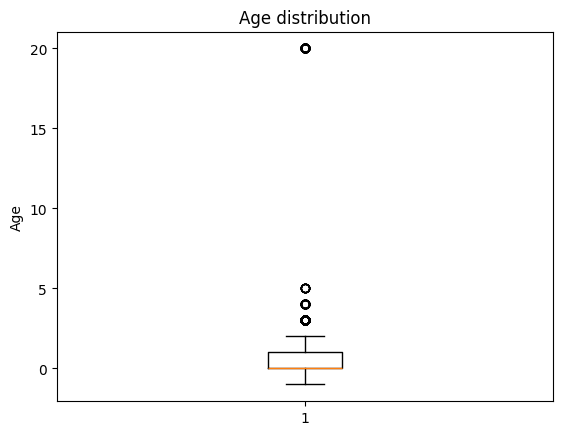

In [66]:
import matplotlib.pyplot as plt

# Example: Boxplot for a single column
plt.boxplot(df2['children'])
plt.title("Age distribution")
plt.ylabel("Age")
plt.show()


In [69]:
condition_children = df2['children'] >= 3
df2['children'] = df2['children'].mask(condition_children, 2)

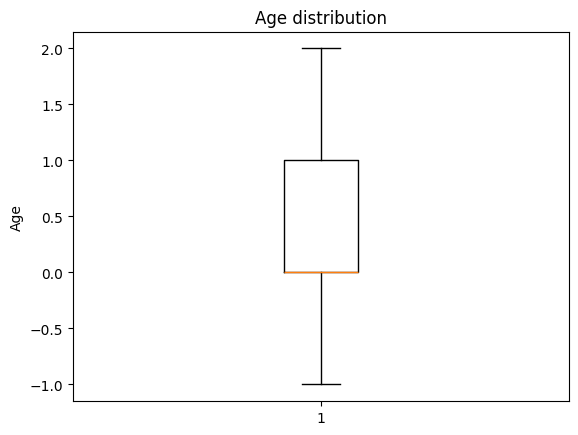

In [70]:
# Example: Boxplot for a single column
plt.boxplot(df2['children'])
plt.title("Age distribution")
plt.ylabel("Age")
plt.show()

In [71]:
df2['children'] = abs(df2['children'])

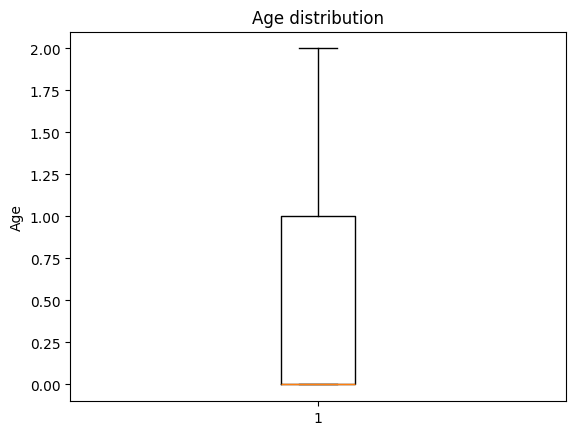

In [72]:
# Example: Boxplot for a single column
plt.boxplot(df2['children'])
plt.title("Age distribution")
plt.ylabel("Age")
plt.show()

In [74]:
# verify the data
sorted(df2['children'].unique().tolist())

[0.0, 1.0, 2.0]

**Feature Scaling**

***standartization***


In [76]:
import numpy as np

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]


In [ ]:
# Calculate mean and standard deviation for each column
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
std_dev

array([ 11.18033989, 111.80339887])

In [79]:
# Standardize data
standardized_data = (data - mean) / std_dev

print("Standardized Data:")
print(standardized_data)

Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


In [80]:
np.mean(standardized_data, axis=0)

array([0., 0.])

In [81]:
np.std(standardized_data, axis=0)

array([1., 1.])

In [82]:
from sklearn.preprocessing import StandardScaler

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
standardized_data_sklearn = scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data_sklearn)

Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


**Min-Max scaling**

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually $0$ to $1$.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X{min}}
$$

<div style="display:flex;justify-content:center;">
<img src="images/normalization_formula.png" />
</div>

In [83]:
data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]


In [85]:
# Calculate mean and standard deviation for each column
min_data = np.min(data, axis=0)
max_data = np.max(data, axis=0)
max_data

array([ 40, 500])

In [86]:
scaled_data = (data - min_data) / (max_data - min_data)
print("Scaled Data:")
print(scaled_data)


Scaled Data:
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


In [88]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Fit and transform the data
scaled_data_sklearn = scaler.fit_transform(data)
print("Scaled Data using MinMaxScaler:")
print(scaled_data_sklearn)

Scaled Data using MinMaxScaler:
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


In [91]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    'data/wine_data.csv',
     usecols=[0,1,2]
    )

df.columns 

Index(['Class label', 'Alcohol', 'Malic acid'], dtype='object')

In [92]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [106]:
min_max_scaled = MinMaxScaler().fit_transform(df)
scaled_df = pd.DataFrame(min_max_scaled, columns=df.columns)
scaled_df.head()

,Class label,Alcohol,Malic acid
0,0.0,0.842105,0.191700
1,0.0,0.571053,0.205534
2,0.0,0.560526,0.320158
3,0.0,0.878947,0.239130
4,0.0,0.581579,0.365613


In [107]:
standardized_data = StandardScaler().fit_transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
standardized_df.head()

,Class label,Alcohol,Malic acid
0,-1.213944,1.518613,-0.562250
1,-1.213944,0.246290,-0.499413
2,-1.213944,0.196879,0.021231
3,-1.213944,1.691550,-0.346811
4,-1.213944,0.295700,0.227694


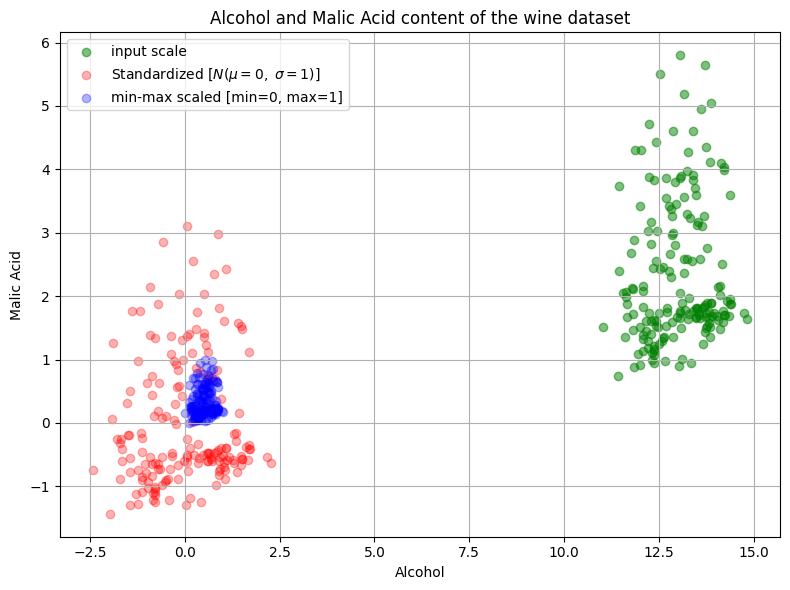

In [109]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
                color='green', label='input scale', alpha=0.5)

    plt.scatter(standardized_df.iloc[:,1], standardized_df.iloc[:,2], color='red',
                label=r'Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(scaled_df.iloc[:,1], scaled_df.iloc[:,2],
                color='blue', label=r'min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

plot()  # call your own plot function
plt.show()


**Robust Scaling** is a technique used to scale data that is robust to outliers. Unlike other scaling methods like **Min-Max Scaling** or **Standardization**, which can be influenced by extreme values, Robust Scaling relies on the median and the interquartile range (IQR). This makes it particularly useful for datasets with significant outliers.


### Formula for Robust Scaling:
$$
X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
$$

Where:
- **Median** is the middle value of the data.
- **IQR (Interquartile Range)** is the range between the 25th percentile (Q1) and the 75th percentile (Q3):  
  $$
  \text{IQR} = Q3 - Q1
  $$

This formula rescales the feature such that the median becomes 0 and the data is scaled based on the spread of the middle 50% of the data (from Q1 to Q3).


### Key Features of Robust Scaling:
1. **Outlier Resistance**: Robust scaling is less affected by extreme values because it uses the median and IQR instead of the mean and standard deviation.
2. **Data Range**: It centers the data around the median and scales it within the IQR range.

### When to Use Robust Scaling:
- When your dataset contains significant outliers.
- When preserving the impact of outliers isn't critical for your model.
- In models where scaling consistency across features is important. 

In [110]:
data = df.values

# step 1: compute the median
median = np.median(data, axis=0)

# step 2: compute the IQR
q75 = np.percentile(data, 75, axis=0)
q25 = np.percentile(data, 25, axis=0)
iqr = q75 - q25

# step 3: apply the scaling
robust_scaled_data = (data - median) / iqr

# Display results
print("Original Data:\n", data[:5])
print("Median:\n", median)
print("IQR:\n", iqr)
print("Robust Scaled Data:\n", robust_scaled_data[:5])

Original Data:
 [[ 1.   14.23  1.71]
 [ 1.   13.2   1.78]
 [ 1.   13.16  2.36]
 [ 1.   14.37  1.95]
 [ 1.   13.24  2.59]]
Median:
 [ 2.    13.05   1.865]
IQR:
 [2.    1.315 1.48 ]
Robust Scaled Data:
 [[-0.5         0.8973384  -0.10472973]
 [-0.5         0.11406844 -0.05743243]
 [-0.5         0.08365019  0.33445946]
 [-0.5         1.00380228  0.05743243]
 [-0.5         0.14448669  0.48986486]]


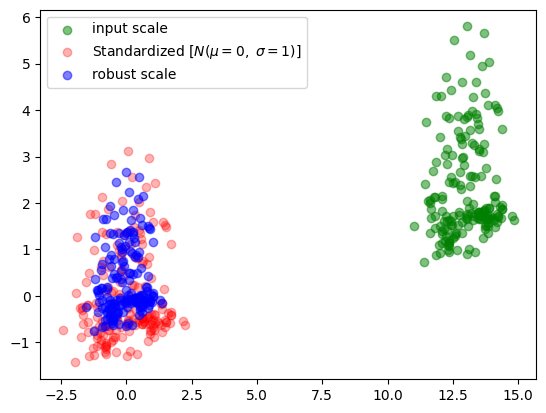

In [112]:
from sklearn.preprocessing import RobustScaler
cols = ['Alcohol', 'Malic acid']
robust_scale = RobustScaler().fit(df[cols])
df_robust = pd.DataFrame(data=robust_scale.transform(df[cols]), columns=robust_scale.feature_names_in_)

plt.scatter(df['Alcohol'], df['Malic acid'], color='green', alpha=0.5, label='input scale')
plt.scatter(standardized_df.iloc[:,1], standardized_df.iloc[:,2], color='red',
            label=r'Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)
plt.scatter(df_robust['Alcohol'], df_robust['Malic acid'], color='blue', alpha=0.5, label='robust scale')
plt.legend()
plt.show()

## Categorical Encoding

In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

Over your learning curve in AI and Machine Learning, one thing you would notice that most of the algorithms work better with numerical inputs. Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it. Neural networks, which is a base of deep-learning, expects input values to be numerical.

This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.

|Bridge Type |
|------------|
|Arch        |
|Beam        |
|Truss       |
|Cantilever  |
|Tied Arch   |
|Suspension  |
|Cable       |

We choose to encode the text values by putting a running sequence for each text values like below:

|Bridge Type <br> (Text) | Bridge Type <br> (Numerical) |
|-------------------|-------------------------|
|Arch               | 0                       |
|Beam               | 1                       |
|Truss              | 2                       |
|Cantilever         | 3                       |
|Tied Arch          | 4                       |
|Suspension         | 5                       |
|Cable              | 6                       |

With this, we completed the label-encoding of variable bridge-type. That’s all label encoding is about. But depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. Apparently, there is no relation between various bridge type, but when looking at the number, one might think that ‘Cable’ bridge type has higher precedence over ‘Arch’ bridge type. The algorithm might misunderstand that data has some kind of hierarchy/order $0 < 1 < 2 < \dots < 6$ and might give $6\times$ more weight to ‘Cable’ in calculation then than ‘Arch’ bridge type.

Let’s consider another column named ‘Safety Level’. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order $0 < 1 < 2 < 3 < 4$ i.e. $\text{none} < \text{low} < \text{medium} < \text{high} < \text{very high}$.

|Safety Level <br> (Text) | Safety Level <br> (Numerical) |
|-------------------------|-------------------------------|
|None                     | 0                             |
|Low                      | 1                             |
|Medium                   | 2                             |
|High                     | 3                             |
|Very-High                | 4                             |

Label encoding in `pandas`

In [113]:
import pandas as pd

data = {'bridge_types': ['Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable']}
bridge_df = pd.DataFrame(data)
bridge_df.value_counts()

bridge_types
Arch            1
Beam            1
Cable           1
Cantilever      1
Suspension      1
Tied Arch       1
Truss           1
Name: count, dtype: int64

In [115]:
bridge_df['bridge_types'] = bridge_df['bridge_types'].astype('category')
bridge_df['bridge_types']

0          Arch
1          Beam
2         Truss
3    Cantilever
4     Tied Arch
5    Suspension
6         Cable
Name: bridge_types, dtype: category
Categories (7, object): ['Arch', 'Beam', 'Cable', 'Cantilever', 'Suspension', 'Tied Arch', 'Truss']

In [116]:
bridge_df.dtypes

bridge_types    category
dtype: object

In [117]:
bridge_df['bridge_types'].cat.codes

0    0
1    1
2    6
3    3
4    5
5    4
6    2
dtype: int8

In [118]:
bridge_df

,bridge_types
0,Arch
1,Beam
2,Truss
3,Cantilever
4,Tied Arch
5,Suspension
6,Cable


In [119]:
bridge_df['bridge_types_cat'] = bridge_df['bridge_types'].cat.codes
bridge_df

,bridge_types,bridge_types_cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


**Label Encoding in `sklearn`**

In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'bridge_types': ['Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable']}
bridge_df = pd.DataFrame(data)

# creating instance of label encoder
l_enc = LabelEncoder()

# assigning numerical values and storing in another column
bridge_df['bridge_types_cat'] = l_enc.fit_transform(bridge_df['bridge_types'])
bridge_df

,bridge_types,bridge_types_cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


### **Ordinal Encoding**


Ordinal encoding is a technique used to encode categorical variables with an inherent order or ranking into numeric values. Unlike label encoding, ordinal encoding is particularly suitable for variables where the sequence of the values has meaning or hierarchy.

**When to Use Ordinal Encoding?**
Ordinal encoding is ideal when:
1. The categorical variable has a clear and logical order (e.g., levels of safety, education degrees).
2. The order matters in the context of your data and the machine learning algorithm should account for it.

**Example of Ordinal Encoding**

Consider the column `Safety Level` from the previous example. Here, the categories have a natural ordering:

| **Safety Level (Text)** | **Safety Level (Numerical)** |
|-------------------------|-----------------------------|
| None                   | 0                           |
| Low                    | 1                           |
| Medium                 | 2                           |
| High                   | 3                           |
| Very High              | 4                           |

This ordering makes sense as "None" is the lowest safety level, and "Very High" is the highest.

**Ordinal Encoding With `pandas`**

In [121]:
import pandas as pd

data = {
    'safety_level': ['None', 'Low', 'Medium', 'High', 'Very High']
}
safety_df = pd.DataFrame(data)

# Define the explicit order for safety levels
order = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}

# Map the 'safety_level' column to numerical values
safety_df['safety_level_num'] = safety_df['safety_level'].map(order)
safety_df

,safety_level,safety_level_num
0,None,0
1,Low,1
2,Medium,2
3,High,3
4,Very High,4


In [122]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = {
    'safety_level': ['None', 'Low', 'Medium', 'High', 'Very High']
}
safety_df = pd.DataFrame(data)

# Creating an instance of OrdinalEncoder
ord_enc = OrdinalEncoder(
    categories=[['None', 'Low', 'Medium', 'High', 'Very High']]  # Specifying the order
)

# Transforming the 'safety_level' column
safety_df['safety_level_num'] = ord_enc.fit_transform(safety_df[['safety_level']])
safety_df

,safety_level,safety_level_num
0,None,0.0
1,Low,1.0
2,Medium,2.0
3,High,3.0
4,Very High,4.0


**Key Points to Remember**
1. **Explicit Order**: When using `OrdinalEncoder`, you must explicitly define the order of categories using the `categories` parameter. If not specified, the order will be determined automatically based on the lexicographical order of the labels.
2. **Context Matters**: Use ordinal encoding only if the categories are inherently ordered. If there is no natural ordering, ordinal encoding can mislead the machine learning model.

**Comparison: Label Encoding vs Ordinal Encoding**

| Feature                     | Label Encoding                 | Ordinal Encoding                |
|-----------------------------|---------------------------------|---------------------------------|
| **Purpose**                 | Converts categories to numbers | Encodes categories with a meaningful order |
| **Order**                   | No inherent order assumed      | Assumes inherent order          |
| **When to Use**             | For unordered categories       | For ordered categories          |

### One-Hot Encoding

### Resources for this content

<a href="https://medium.com/womenintechnology/data-preprocessing-steps-for-machine-learning-in-phyton-part-1-18009c6f1153">Data Preprocessing Steps for Machine Learning in Python</a>

<a href="https://lakefs.io/blog/data-preprocessing-in-machine-learning/">Data Preprocessing in Machine Learning: Steps & Best Practices</a>


<a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html">About Feature Scaling and Normalization</a>

<a href="https://proclusacademy.com/blog/robust-scaler-outliers/">Robust Scaling: Why and How to Use It to Handle Outliers</a>

<a href="https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b">All you need to know about encoding techniques!</a>

<a href="https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd">Categorical encoding using Label-Encoding and One-Hot-Encoder</a>

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red'],
    'size': ['S', 'M', 'L', 'S']
})

encoded_df = pd.get_dummies(df, columns=['color'])
encoded_df


,size,color_blue,color_green,color_red
0,S,False,False,True
1,M,True,False,False
2,L,False,True,False
3,S,False,False,True


In [126]:
pd.get_dummies(df, columns=['color', 'size'])


,color_blue,color_green,color_red,size_L,size_M,size_S
0,False,False,True,False,False,True
1,True,False,False,False,True,False
2,False,True,False,True,False,False
3,False,False,True,False,False,True


In [129]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red']
})

# Set up the encoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False gives dense NumPy array

# Fit and transform
encoded = encoder.fit_transform(df[['color']])

# View result
print(encoded)


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
